In [1]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

###### Obtaining all the csv Files

In [2]:
#@author Tasneem
crime2017_csv = "Resources/OhioCrime2017_NoNan.csv"
crime2016_csv = "Resources/OhioCrime2016_NoNan.csv"
crime2015_csv = "Resources/OhioCrime2015_NoNan.csv"
crime2014_csv = "Resources/OhioCrime2014_NoNan.csv"
crime2013_csv = "Resources/OhioCrime2013_NoNan.csv"
crime2012_csv = "Resources/OhioCrime2012_NoNan.csv"
Zillow_Ohio_csv = "Resources/newZillowOH_Data.csv"
Ohio_Crime_csv = "Resources/CrimeData_merged.csv"
#@Author Taylor
crimedata="Resources/CrimeData_top10.csv"
crime2012="Resources/Crime2012_top10.csv"
housingdata="Resources/newZillowOH_top10.csv"



In [3]:
#File Containing Data for Zillow
zillow_df = pd.read_csv(Zillow_Ohio_csv)
zillow_df = zillow_df.fillna(0)

#File Containing Data for Crime (2014-2017)
ohiocrime_df = pd.read_csv(Ohio_Crime_csv)
ohiocrime_df = ohiocrime_df.fillna(0)
#@Author Taylor
crimedata_df = pd.read_csv(crimedata)
crimedata_df
crime2012_df = pd.read_csv(crime2012)
crime2012_df
housingdata_df = pd.read_csv(housingdata)
housingdata_df

,RegionID,RegionName,StateName,SizeRank,2012,2013,2014,2015,2016,2017
0,10920.0,Columbus,Ohio,15.0,1166700,1264400,1416700,1525200,1608000,1749600
1,24115.0,Cleveland,Ohio,43.0,0,0,0,294300,486200,625500
2,4099.0,Cincinnati,Ohio,53.0,0,0,0,0,0,1436800
3,34303.0,Toledo,Ohio,65.0,466700,550500,675400,771600,808800,861900
4,30141.0,Akron,Ohio,123.0,0,0,0,136400,577700,692400
5,51260.0,Canton,Ohio,200.0,0,0,0,0,0,719600
6,53812.0,Parma,Ohio,489.0,925100,969900,998200,1071500,1153100,1243300
7,28060.0,Youngstown,Ohio,628.0,0,0,0,164200,261300,308200
8,32572.0,Lorain,Ohio,637.0,0,0,0,0,0,455400
9,45221.0,Fairfield,Ohio,1025.0,0,883600,1509200,1425100,1658600,1696900


In [4]:
#Renaming the COlumns for Zillow Data
zillow_df = zillow_df.rename(columns={"RegionName": "City", "2017": "2017 Median Price", "2016":"2016 Median Price",
                                     "2015": "2015 Median Price", "2014": "2014 Median Price", "2013":"2013 Median Price",
                                     "2012":"2012 Median Price"})
zillow_df.columns



Index(['RegionID', 'City', 'StateName', 'SizeRank', '2012 Median Price',
       '2013 Median Price', '2014 Median Price', '2015 Median Price',
       '2016 Median Price', '2017 Median Price'],
      dtype='object')

**Merging the Data from Crime and Housing.**
**And calculating the Crime rate for each year and adding it to the Dataframe**

In [5]:
#The csv obtained in this code is just for reference and is not used further in the code.
merge_Zillow_Crime_df = pd.merge(ohiocrime_df, zillow_df, on = "City")
merge_Zillow_Crime_df.to_csv("Resources/CrimeZillow_MergeData.csv")
merge_Zillow_Crime_df.head()

merge_Zillow_Crime_df=merge_Zillow_Crime_df.sort_values("2017 Population", ascending=False)
merge_ZillowCrime_df = merge_Zillow_Crime_df.drop_duplicates()
merge_ZillowCrime_df
merge_Zillow_Crime_df.to_csv("Resources/SortedCrimeZillow_MergeData.csv")

In [6]:

merge_Zillow_Crime_df["Crime Rate 2017"] = ((merge_Zillow_Crime_df["2017 Violent Crime"])/(merge_Zillow_Crime_df["2017 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2016"] = ((merge_Zillow_Crime_df["2016 Violent Crime"])/(merge_Zillow_Crime_df["2016 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2015"] = ((merge_Zillow_Crime_df["2015 Violent Crime"])/(merge_Zillow_Crime_df["2015 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2014"] = ((merge_Zillow_Crime_df["2014 Violent Crime"])/(merge_Zillow_Crime_df["2014 Population"]))*100000
merge_Zillow_Crime_df["Crime Rate 2013"] = ((merge_Zillow_Crime_df["2013 Violent Crime"])/(merge_Zillow_Crime_df["2013 Population"]))*100000

merge_Zillow_Crime_df.reset_index().tail()

,index,Unnamed: 0,Unnamed: 0_x,County_x,City,2017 Population,2017 Violent Crime,2017 Murder,2017 Rape,2017 Robbery,...,2013 Median Price,2014 Median Price,2015 Median Price,2016 Median Price,2017 Median Price,Crime Rate 2017,Crime Rate 2016,Crime Rate 2015,Crime Rate 2014,Crime Rate 2013
120,10,332,643,Clermont County,Loveland,823,0,0,0,0,...,0,0,0,0,1630000,0.0,0.000000,0.000000,50.479556,51.046452
121,102,274,530,Summit County,Tallmadge,287,0,0,0,0,...,1084600,1753500,1697000,1735400,1868000,0.0,133.619938,98.665119,133.302423,NaN
122,51,181,359,Franklin County,New Albany,168,0,0,0,0,...,4896800,4655800,5024200,5159200,5888300,0.0,48.971596,52.460392,33.141847,22.875443
123,39,114,199,Fairfield County,Pickerington,76,0,0,0,0,...,2065800,2292400,2283300,2466800,2685000,0.0,80.144260,NaN,NaN,NaN
124,54,142,251,Dayton,Centerville,2,0,0,0,0,...,1842400,1873600,1770600,1963900,1979400,0.0,54.505052,58.611739,96.045434,NaN


- Ploting for top 5 populated city, just picking the first 5, as it is sorted with Population.
- Ploting the line graph
- Ploting the line regression and obtaining the p-value

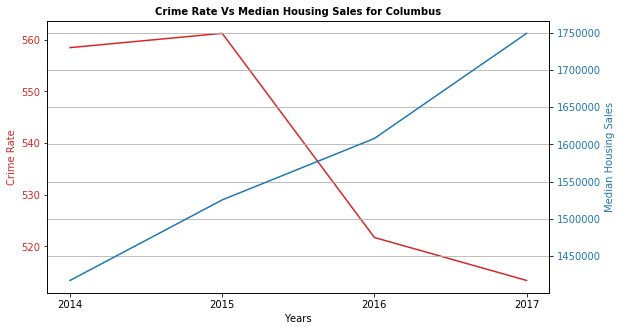

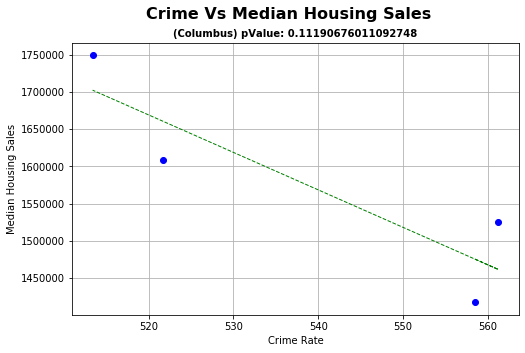

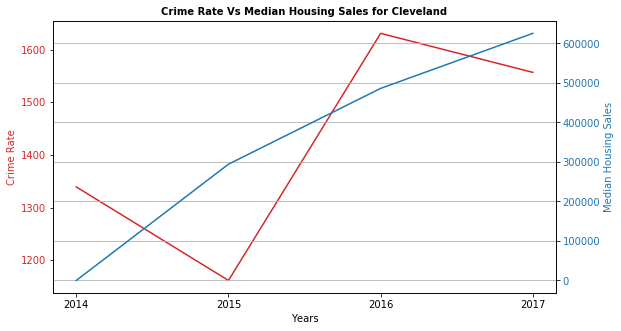

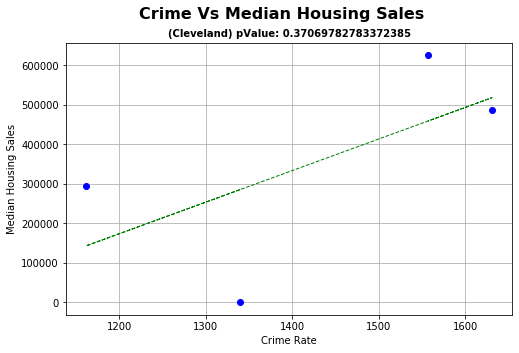

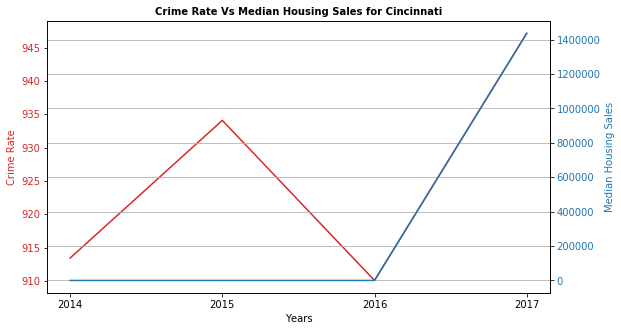

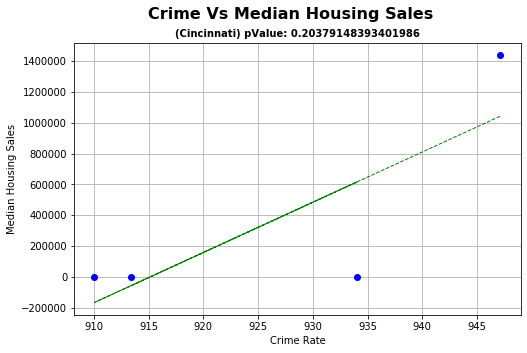

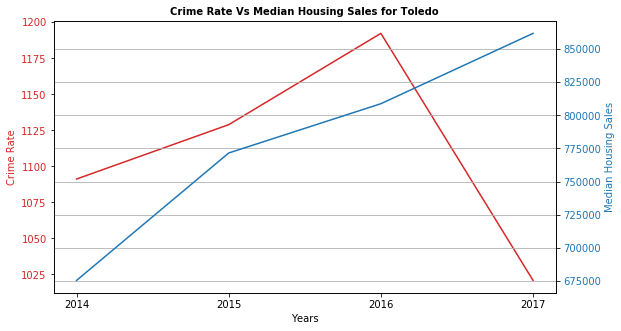

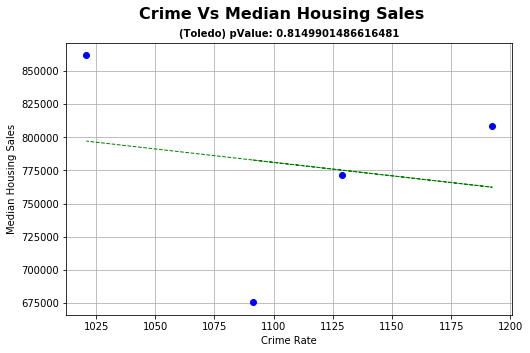

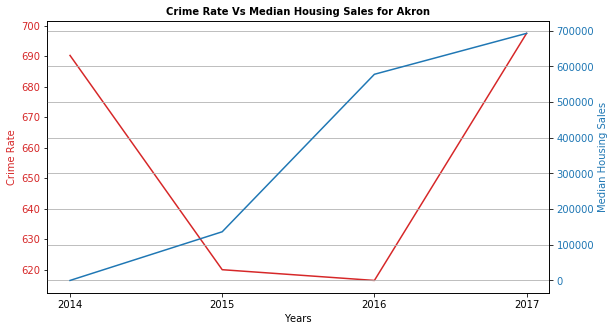

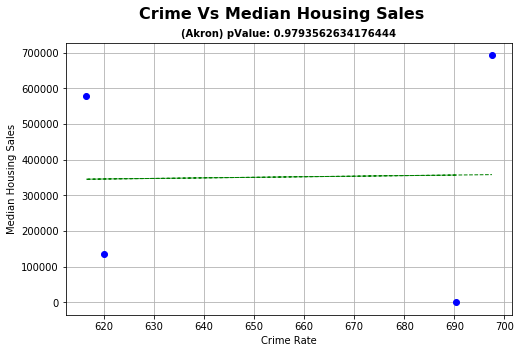

In [7]:
#@author Tasneem
#Retrieving data to plot for A City (index in the iLoc below will retrieve a City)
years =  ["2014","2015","2016","2017"]
citygraphs = [0,1,2,3,4]

for gCount in citygraphs:
    city1Data = merge_Zillow_Crime_df.iloc[gCount,:]
    cityPercent = [city1Data["Crime Rate 2014"],city1Data["Crime Rate 2015"],city1Data["Crime Rate 2016"],city1Data["Crime Rate 2017"]]
    housingMedian = [city1Data["2014 Median Price"],city1Data["2015 Median Price"],city1Data["2016 Median Price"],city1Data["2017 Median Price"]]
    plot_mergeData_df = pd.DataFrame({"Years" : years, "CrimeRate" : cityPercent, "Housing_Median" : housingMedian })

    plot_years = plot_mergeData_df["Years"]
    crimeRate = pd.to_numeric(plot_mergeData_df["CrimeRate"])
    housingMedian =  plot_mergeData_df["Housing_Median"]
    citiName = city1Data["City"]


    fig, ax1 = plt.subplots(figsize=(9,5))

    #Plotting Crime Percent
    color = 'tab:red'
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Crime Rate', color=color)
    ax1.plot(plot_years, crimeRate, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

     # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx() 

    #Plotting Housing Median
    color = 'tab:blue'
    ax2.set_ylabel('Median Housing Sales', color=color)  # we already handled the x-label with ax1
    ax2.plot(plot_years, housingMedian, color=color)
    ax2.tick_params(axis='y', labelcolor=color)


    #fig.tight_layout()
    plt.grid(True)
    plt.title("Crime Rate Vs Median Housing Sales for " + citiName,fontsize=10, fontweight="bold")

    plt.savefig("images/plots/CrimeVsHousingMedian_Yearly_"+citiName+".png")


    # Regression for Each City (over 3 years)
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(crimeRate, housingMedian)
    fit = vc_slope * crimeRate + vc_int

    # Plot data
    fig, ax = plt.subplots(figsize=(8,5))

    plt.suptitle("Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")


    ax.set_xlabel("Crime Rate")
    ax.set_ylabel("Median Housing Sales")

    ax.plot(crimeRate, housingMedian, linewidth=0, marker='o',color="b")
    ax.plot(crimeRate, fit, 'g--', linewidth=1)

    plt.grid(True)
    plt.title("(" + citiName+") pValue: "+ str(vc_p),fontsize=10, fontweight="bold")

    plt.savefig("images/plots/"+citiName+"_pValue.png")
    #plt.show()

- Plotting a bar graph for the top 20 poulated cities, Crime Rate Vs Housing Median for year 2017
- Plotting a line regression and obtaining the pvalue


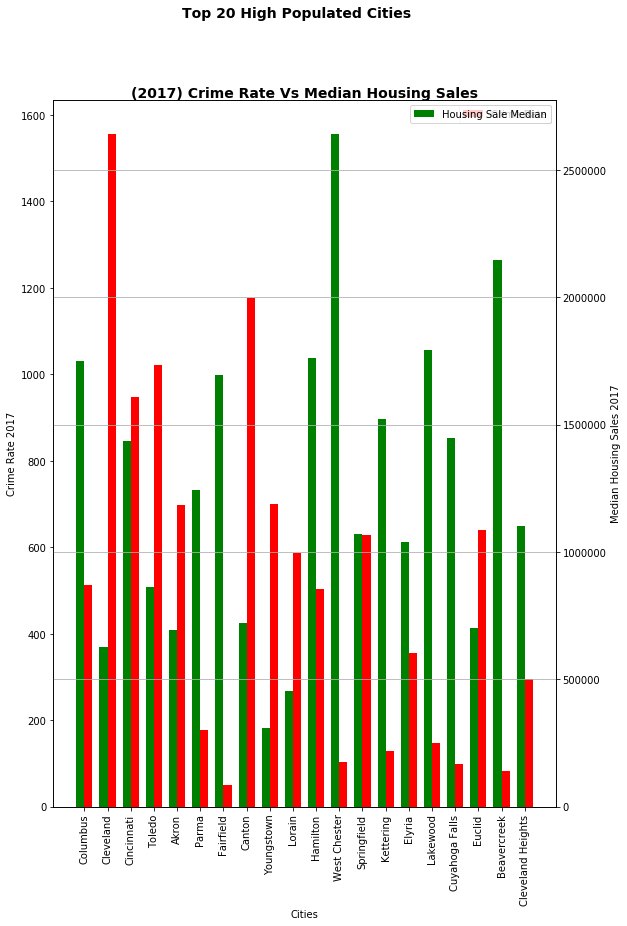

In [8]:
#@author Tasneem
city20 = merge_Zillow_Crime_df.head(20)
labelcity = city20["City"].tolist()
#print(labelcity)
#plottiing a graph for just 20 cities
crime20_rate2017 = pd.to_numeric(city20["Crime Rate 2017"])
housing20_median2017 = pd.to_numeric(city20["2017 Median Price"])

x = np.arange(len(labelcity))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(9,13))
#Plotting Crime Percent
#color = 'tab:red'
ax1.set_xlabel('Cities')
ax1.set_ylabel('Crime Rate 2017')
ax1.bar(x + width/2, crime20_rate2017, width, label='Crime Rate', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(labelcity,rotation='vertical')
ax1.legend()
 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
#color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales 2017')  # we already handled the x-label with ax1
ax2.bar(x - width/2, housing20_median2017, width, label='Housing Sale Median', color='g')

fig.suptitle("Top 20 High Populated Cities",fontsize=14, fontweight="bold",va='top')
#fig.tight_layout()

plt.legend(loc='best')
plt.grid(True)
plt.title("(2017) Crime Rate Vs Median Housing Sales", fontsize=14, fontweight="bold",va='top')



plt.savefig("images/plots/CrimeVsHousingMedian_2017_top20.png")
plt.show()

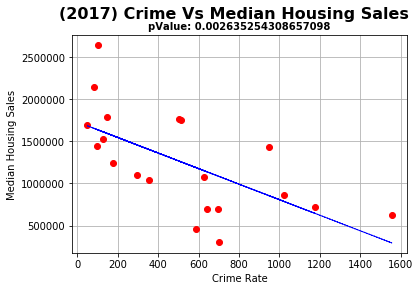

In [9]:
#@author Tasneem
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime20_rate2017, housing20_median2017)

fit = vc_slope * crime20_rate2017 + vc_int

# Plot data
fig, ax = plt.subplots()
fig.suptitle("(2017) Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")

ax.set_xlabel("Crime Rate")
ax.plot(crime20_rate2017, housing20_median2017, linewidth=0, marker='o',color="r")
ax.plot(crime20_rate2017, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sales")
plt.grid(True)
plt.title("pValue: "+ str(vc_p),fontsize=10, fontweight="bold")


plt.savefig("images/plots/CrimeVsHousingMedian_2017_top20_PVALUE.png")
plt.show()

- Plotting a bar graph for the top 20 poulated cities, Crime Rate Vs Housing Median for year 2016
- Plotting a line regression and obtaining the pvalue


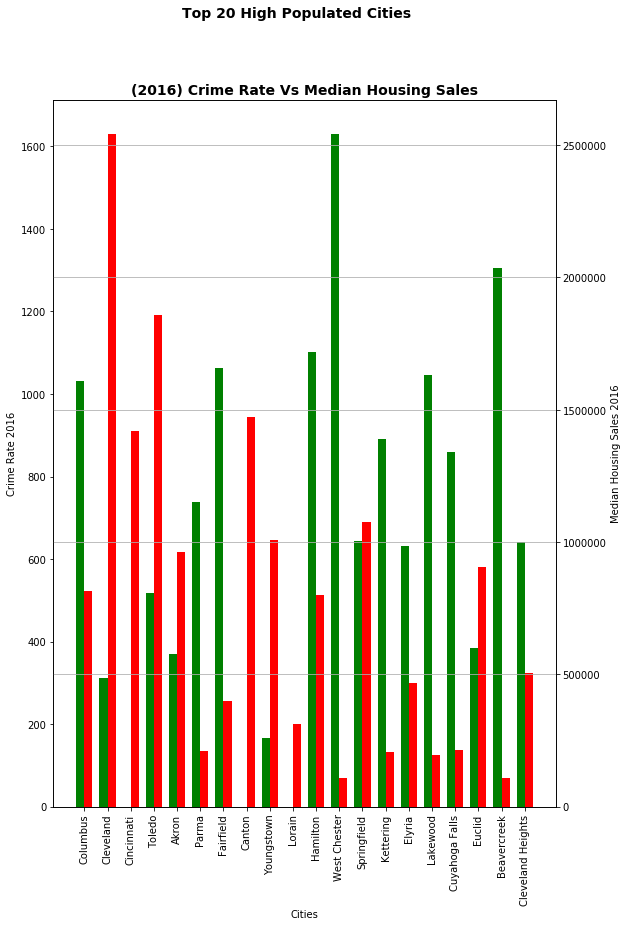

In [10]:
#@author Tasneem

#plottiing a graph for just 20 cities
crime20_rate2016 = pd.to_numeric(city20["Crime Rate 2016"])
housing20_median2016 = pd.to_numeric(city20["2016 Median Price"])

x = np.arange(len(labelcity))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(9,13))
#Plotting Crime Percent
#color = 'tab:red'
ax1.set_xlabel('Cities')
ax1.set_ylabel('Crime Rate 2016')
ax1.bar(x + width/2, crime20_rate2016, width, label='Crime Rate', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(labelcity,rotation='vertical')

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx() 

#Plotting Housing Median
#color = 'tab:blue'
ax2.set_ylabel('Median Housing Sales 2016')  # we already handled the x-label with ax1
ax2.bar(x - width/2, housing20_median2016, width, label='Housing Sale Median', color='g')

fig.suptitle("Top 20 High Populated Cities",fontsize=14, fontweight="bold")
#fig.tight_layout()
plt.grid(True)
plt.title("(2016) Crime Rate Vs Median Housing Sales", fontsize=14, fontweight="bold")


plt.savefig("images/plots/CrimeVsHousingMedian_2016_top20.png")
plt.show()

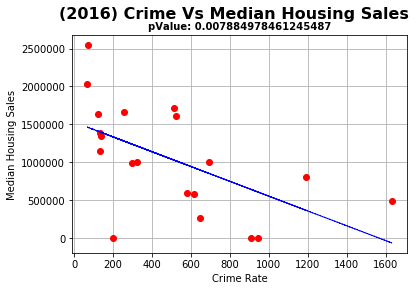

In [11]:
#@author Tasneem
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime20_rate2016, housing20_median2016)

fit = vc_slope * crime20_rate2016 + vc_int

# Plot data
fig, ax = plt.subplots()
fig.suptitle("(2016) Crime Vs Median Housing Sales", fontsize=16, fontweight="bold")

ax.set_xlabel("Crime Rate")
ax.plot(crime20_rate2016, housing20_median2016, linewidth=0, marker='o',color="r")
ax.plot(crime20_rate2016, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sales")
plt.grid(True)
plt.title("pValue: "+ str(vc_p),fontsize=10, fontweight="bold")


plt.savefig("images/plots/CrimeVsHousingMedian_2016_top20_PVALUE.png")
plt.show()

# Taylor's Code Merged here, csv is in the upper part with all other csv's


In [12]:
table17=crimedata_df[["City","2017 Population","2017 Violent Crime", "2017 Murder","2017 Rape","2017 Robbery","2017 Aggravated Assault", "2017 Rate"]]
table17
table12=crime2012_df[["City","POPULATION","2012 Violent Crime", "2012 Murder","2012 Rape","2012 Robbery","2012 Aggravated Assault","2012 Rate"]]

<function matplotlib.pyplot.show(*args, **kw)>

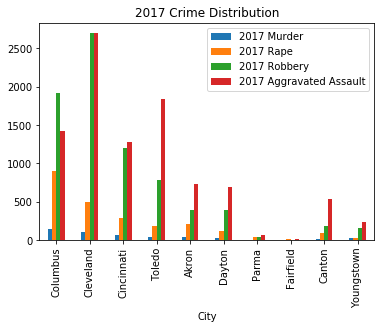

In [13]:
table17.plot(x="City", y=["2017 Murder", "2017 Rape", "2017 Robbery", "2017 Aggravated Assault"], kind="bar", title="2017 Crime Distribution")

plt.savefig("images/2017CrimeBar.png")
plt.show

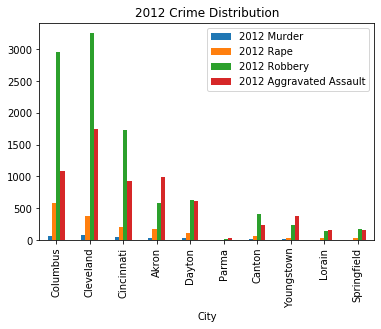

In [14]:
table12.plot(x="City", y=["2012 Murder", "2012 Rape", "2012 Robbery", "2012 Aggravated Assault"],
             kind="bar", title="2012 Crime Distribution")

plt.savefig("images/2012CrimeBar.png")
plt.show()

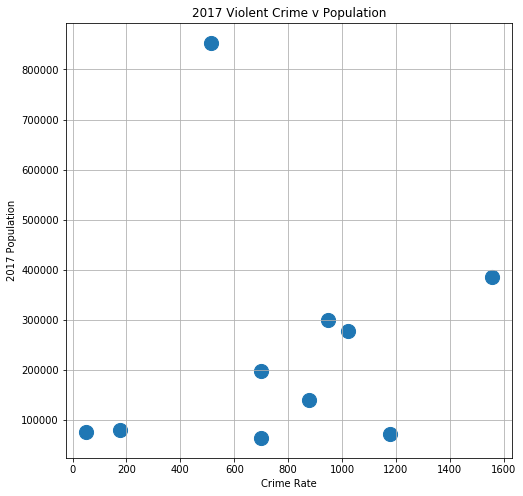

In [15]:
table17.plot(kind="scatter", x="2017 Rate", y="2017 Population", grid=True, figsize=(8,8),
              title="2017 Violent Crime v Population", s=200)
plt.xlabel("Crime Rate")

plt.savefig("images/2017PopvRate.png")
plt.show()

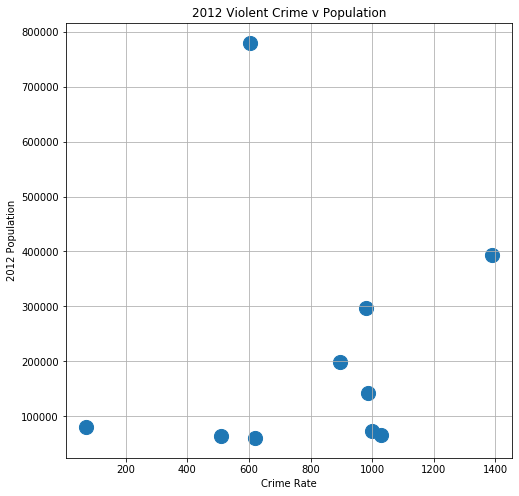

In [16]:
table12.plot(kind="scatter", x="2012 Rate", y="POPULATION", grid=True, figsize=(8,8),
              title="2012 Violent Crime v Population", s=200)
plt.xlabel("Crime Rate")
plt.ylabel("2012 Population")

plt.savefig("images/2012PopvRate.png")
plt.show()

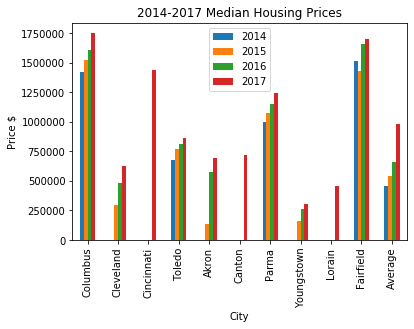

In [17]:
housingdata_df.plot(x="RegionName", y=["2014", "2015", "2016", "2017"], kind="bar", title="2014-2017 Median Housing Prices")
plt.xlabel("City")
plt.ylabel("Price $")

plt.savefig("images/HousingBar.png")
plt.show()

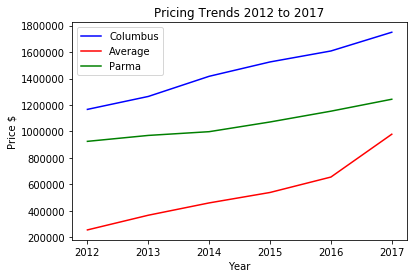

In [18]:
years=("2012","2013","2014","2015","2016","2017")
columbus=(1166700,1264400,1416700,1525200,1608000,1749600)
avg=(255850,366840,459950,538830,655370,978960)
parma=(925100,969900,998200,1071500,1153100,1243300)

fig, ax = plt.subplots()

columbusline = ax.plot(years, columbus, 
                        color="blue",label="Columbus")
avgline = ax.plot(years, avg, 
                        color="red",label="Average")
parmaline= ax.plot(years, parma, 
                        color="green",label="Parma")
# Create a legend for our chart
plt.legend(loc="best")
plt.title("Pricing Trends 2012 to 2017")
plt.xlabel("Year")
plt.ylabel("Price $")

# Show the chart

plt.savefig("images/PricingTrends.png")
plt.show()

In [19]:
popprice2017 = merge_Zillow_Crime_df[["City","2017 Population", "2017 Median Price"]]
popprice2017.head()

,City,2017 Population,2017 Median Price
44,Columbus,872205,1749600
11,Cleveland,385351,625500
56,Cincinnati,299116,1436800
74,Toledo,277116,861900
110,Akron,197412,692400


In [20]:
popprice2014 = merge_Zillow_Crime_df[["City","2014 Population", "2014 Median Price"]]
popprice2014.head()

,City,2014 Population,2014 Median Price
44,Columbus,830811.0,1416700
11,Cleveland,388655.0,0
56,Cincinnati,297671.0,0
74,Toledo,281150.0,675400
110,Akron,197891.0,0


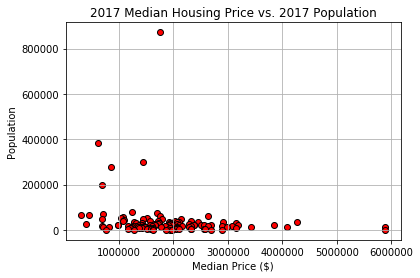

In [21]:
fig1, ax1 = plt.subplots()
ax1.scatter(popprice2017["2017 Median Price"],popprice2017["2017 Population"], marker="o", color="red", edgecolor="black")

plt.title("2017 Median Housing Price vs. 2017 Population")
plt.ylabel("Population")
plt.xlabel("Median Price ($)")
plt.grid(True)

plt.savefig("images/2017 Median Housing Price vs. 2017 Population.png")
plt.show()

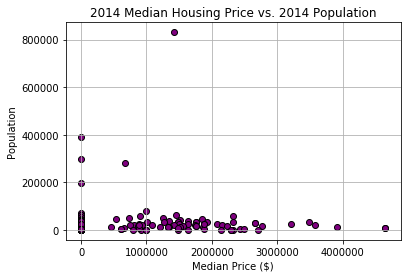

In [22]:
fig2, ax2 = plt.subplots()
ax2.scatter(popprice2014["2014 Median Price"],popprice2014["2014 Population"], marker="o", color="purple", edgecolor="black")

plt.title("2014 Median Housing Price vs. 2014 Population")
plt.ylabel("Population")
plt.xlabel("Median Price ($)")
plt.grid(True)

plt.savefig("images/2014 Median Housing Price vs. 2017 Population.png")
plt.show()

### Maria's Code Merged here. 

### Create dataframe to pull 2017 crime rate and housing values with 2017 Population by city. Created scatter plots with this information, along with p-value calculation.

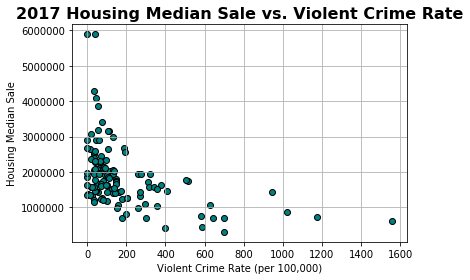

In [23]:
Crime_PropertyValue_2017df = merge_Zillow_Crime_df[["City","2017 Median Price", "Crime Rate 2017", "2017 Population"]]
Crime_PropertyValue_2017df.head()
fig3, ax3 = plt.subplots()
plt.scatter(Crime_PropertyValue_2017df["Crime Rate 2017"], Crime_PropertyValue_2017df["2017 Median Price"], color="teal", marker="o", edgecolor="black")

plt.title("2017 Housing Median Sale vs. Violent Crime Rate", fontsize=16, fontweight="bold")
plt.ylabel("Housing Median Sale")
plt.xlabel("Violent Crime Rate (per 100,000)")
plt.grid(True)

plt.savefig("images/Violent Crime Rate (per 100,000).png")
plt.show()

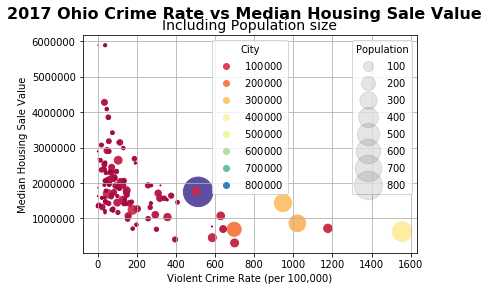

In [24]:
#Creating plots with visualization on population size for 2017
crime_rate= Crime_PropertyValue_2017df["Crime Rate 2017"]
median_housing = Crime_PropertyValue_2017df["2017 Median Price"]
population = Crime_PropertyValue_2017df["2017 Population"]
city = Crime_PropertyValue_2017df["City"]
fig, ax = plt.subplots()
fig.suptitle("2017 Ohio Crime Rate vs Median Housing Sale Value", fontsize=16, fontweight="bold")
plt.title("Including Population size", fontsize = 14)

scatter = ax.scatter(crime_rate, median_housing, c=population, s=population/1000, cmap="Spectral")
                
legend1 = ax.legend(*scatter.legend_elements(),
                     loc="upper center", title="City")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.1)
legend2 = ax.legend(handles, labels, loc="upper right", title="Population")

plt.ylabel("Median Housing Sale Value")
plt.xlabel("Violent Crime Rate (per 100,000)")
plt.grid(True)

plt.savefig("Images/2017 Ohio Crime Rate vs Median Housing w Pop size Sale.png")
plt.show()

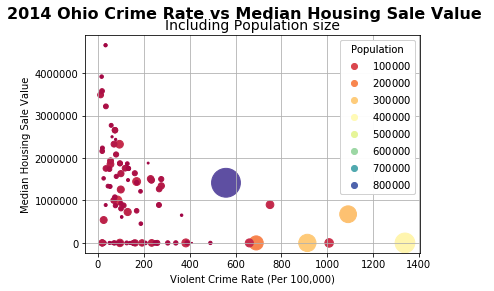

In [25]:
#Creating plots with visualization on population size for 2014
Crime_PropertyValue_2014df = merge_Zillow_Crime_df[["City","2014 Median Price", "Crime Rate 2014", "2014 Population"]]
Crime_PropertyValue_2014df.head()

crime_rate= Crime_PropertyValue_2014df["Crime Rate 2014"]
median_housing = Crime_PropertyValue_2014df["2014 Median Price"]
population = Crime_PropertyValue_2014df["2014 Population"]
city = Crime_PropertyValue_2014df["City"]
fig, ax = plt.subplots()
fig.suptitle("2014 Ohio Crime Rate vs Median Housing Sale Value ", fontsize=16, fontweight="bold")
plt.title("Including Population size", fontsize = 14)
scatter = ax.scatter(crime_rate, median_housing, c=population, s=population/1000, cmap="Spectral")
                
legend1 = ax.legend(*scatter.legend_elements(),
                     loc="best", title="Population")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.1)

plt.ylabel("Median Housing Sale Value")
plt.xlabel("Violent Crime Rate (Per 100,000)")
plt.grid(True)

plt.savefig("Images/2014 Ohio Crime Rate vs. Median Housing Sale(inc Pop. size).png")
plt.show()

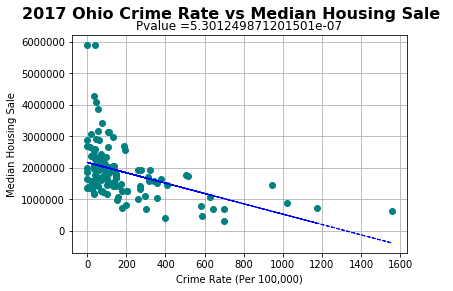

In [26]:
#calculating p-value of 2017 merged data 
Data1=pd.to_numeric(Crime_PropertyValue_2017df["Crime Rate 2017"])
Data2=pd.to_numeric(Crime_PropertyValue_2017df["2017 Median Price"])
# Set line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Data1 , Data2)
fit = vc_slope * Data1 + vc_int
# Plot data
fig, ax = plt.subplots()
fig.suptitle("2017 Ohio Crime Rate vs Median Housing Sale ", fontsize=16, fontweight="bold")
ax.set_xlabel("Crime Rate (Per 100,000)")
ax.plot(Data1, Data2, linewidth=0, marker='o',color="teal")
ax.plot(Data1, fit, "b--", linewidth=1)
ax.set_ylabel("Median Housing Sale")
plt.title("Pvalue ="+str(5.301249871201501e-07))

plt.grid()
plt.savefig("Images/2017 Ohio Crime Rate vs. Median Housing Sale Value.png")
plt.show()

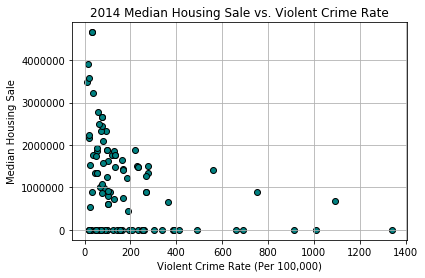

In [27]:
Crime_PropertyValue_2014df = merge_Zillow_Crime_df[["City","2014 Median Price", "Crime Rate 2014"]]
Crime_PropertyValue_2014df.head()
plt.scatter(Crime_PropertyValue_2014df["Crime Rate 2014"], Crime_PropertyValue_2014df["2014 Median Price"], color = "teal", marker="o", edgecolor="black")

plt.title("2014 Median Housing Sale vs. Violent Crime Rate")
plt.ylabel("Median Housing Sale")
plt.xlabel("Violent Crime Rate (Per 100,000)")
plt.grid(True)
plt.show()

### Grouped by population size, calculated average Ohio crime rate, and average housing value. Created plots based on these results.

In [28]:
#Ohio Avg. Crime Rate
CrimeRate_df = merge_Zillow_Crime_df[["2017 Population","City","Crime Rate 2013", "Crime Rate 2014",
                                      "Crime Rate 2015", "Crime Rate 2016","Crime Rate 2017", 
                                     "2014 Median Price", "2015 Median Price", "2016 Median Price", "2017 Median Price"]]
CrimeRate_df = CrimeRate_df.rename(columns={"Crime Rate 2016": "2016", "Crime Rate 2015": "2015",
                                            "Crime Rate 2014": "2014",  "Crime Rate 2013": "2013",
                                           "Crime Rate 2017": "2017"})

CrimeRate_df =CrimeRate_df.fillna(0)
#CrimeRate_df= CrimeRate_df.set_index("City")
AverageOH_Crime = CrimeRate_df.mean()
#AverageOH_Crime

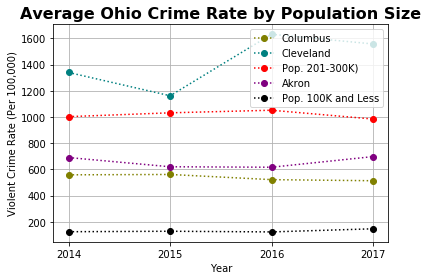

In [29]:
#Created bins by population size for cities in Ohio
size_bins = [0, 100000, 200000, 300000, 40000,880000]
bins = ["Pop. 100000 and less", "Pop. 100001 - 200000", "Pop. 200001 - 300000","Pop. 300001 - 400000","Pop. 400000 and over"]
pd.cut(CrimeRate_df["2017 Population"], [0, 100000, 200000, 300000,400000,880000], labels=bins)
CrimeRate_df["City Size"] = pd.cut(CrimeRate_df["2017 Population"],[0, 100000, 200000, 300000,400000, 880000],labels=bins)
CrimeRate_dfGrouped = CrimeRate_df.groupby("City Size")
CrimeRate_dfGrouped.mean()
crimerate_bycitysize = pd.DataFrame(CrimeRate_dfGrouped[ "2014", "2015", "2016", "2017"].mean())
crimerate_bycitysize
#Scores_by_sizeGrouped = Scores_by_size.groupby("School Size")
crimerate_bycitysize.to_csv("CrimeRate_byCitySize.csv")
crimerate_bycitysize

years = crimerate_bycitysize.keys()
population1, = plt.plot(years, crimerate_bycitysize.loc["Pop. 400000 and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Columbus", marker = 'o')
population2, = plt.plot(years, crimerate_bycitysize.loc["Pop. 300001 - 400000",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Cleveland", marker = 'o')
population3, = plt.plot(years, crimerate_bycitysize.loc["Pop. 200001 - 300000",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 201-300K)", marker = 'o')
population4 = plt.plot(years, crimerate_bycitysize.loc["Pop. 100001 - 200000",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Akron", marker = 'o')
population4 = plt.plot(years, crimerate_bycitysize.loc["Pop. 100000 and less",["2014","2015","2016","2017"]], 
                                                        color = "black", linestyle =":", label = "Pop. 100K and Less", marker = 'o')


plt.title("Average Ohio Crime Rate by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Violent Crime Rate (Per 100,000)")
plt.xlabel("Year")
plt.legend(loc='best')
plt.grid()

plt.savefig("Images/Avg Ohio Crime Rate by Population size.png")
plt.show()

In [30]:
size_bins = [0, 100000, 200000, 300000, 40000,880000]
bins = ["Pop. 100000 and less", "Pop. 100001 - 200000", "Pop. 200001 - 300000","Pop. 300001 - 400000","Pop. 400000 and over"]
pd.cut(CrimeRate_df["2017 Population"], [0, 100000, 200000, 300000,400000,880000], labels=bins)
CrimeRate_df["City Size"] = pd.cut(CrimeRate_df["2017 Population"],[0, 100000, 200000, 300000,400000, 880000],labels=bins)
CrimeRate_dfGrouped = CrimeRate_df.groupby("City Size")
CrimeRate_dfGrouped.mean()
Housingprice_bycitysize = pd.DataFrame(CrimeRate_dfGrouped["2014 Median Price", "2015 Median Price",
                                                              "2016 Median Price","2017 Median Price" ].mean())
Housingprice_bycitysize=Housingprice_bycitysize.rename(columns={"2014 Median Price":"2014","2015 Median Price":"2015",
                                                                "2016 Median Price":"2016","2017 Median Price":"2017"})

Housingprice_bycitysize

,2014,2015,2016,2017
City Size,,,,
Pop. 100000 and less,1.054537e+06,1.211853e+06,1.544993e+06,1.905577e+06
Pop. 100001 - 200000,0.000000e+00,1.364000e+05,5.777000e+05,6.924000e+05
Pop. 200001 - 300000,3.377000e+05,3.858000e+05,4.044000e+05,1.149350e+06
Pop. 300001 - 400000,0.000000e+00,2.943000e+05,4.862000e+05,6.255000e+05
Pop. 400000 and over,1.416700e+06,1.525200e+06,1.608000e+06,1.749600e+06


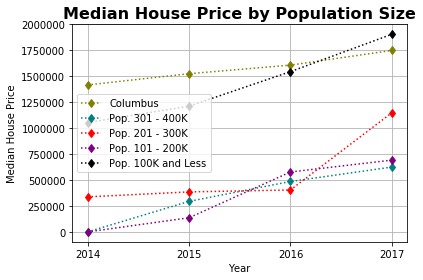

In [31]:
years = Housingprice_bycitysize.keys()
HousePrice1, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 400000 and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Columbus", marker = 'd')
HousePrice2, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 300001 - 400000",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Pop. 301 - 400K", marker = 'd')
HousePrice3, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 200001 - 300000",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 201 - 300K", marker = 'd')
HousePrice4 = plt.plot(years, Housingprice_bycitysize.loc["Pop. 100001 - 200000",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Pop. 101 - 200K", marker = 'd')
HousePrice5 = plt.plot(years, Housingprice_bycitysize.loc["Pop. 100000 and less",["2014","2015","2016","2017"]], 
                                                        color = "black", linestyle =":", label = "Pop. 100K and Less", marker = 'd')
plt.grid()
plt.title("Median House Price by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Median House Price")
plt.xlabel("Year")
plt.legend(loc='best')
plt.savefig("Images/Avg Median Price by Population size.png")
plt.show()

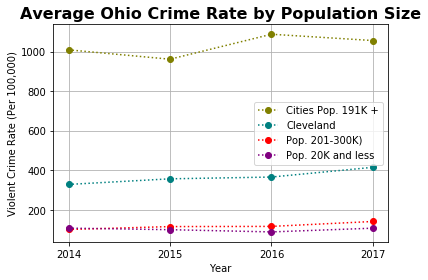

In [32]:
#Created new bins by population size for cities in Ohio, grouping large cities like Columbus and Cleveland together
size_bins = [0, 20000, 50000, 80000,190000, 870000]
bins = ["Pop. 20K and less", "Pop. 21K - 50K", "Pop. 51K - 80K","Pop. 81K - 190K","Pop. 191K and over"]
pd.cut(CrimeRate_df["2017 Population"], [0, 20000, 50000, 80000,190000, 870000], labels=bins)
CrimeRate_df["City Size"] = pd.cut(CrimeRate_df["2017 Population"],[0, 20000, 50000, 80000,190000, 870000],labels=bins)
CrimeRate_dfGrouped = CrimeRate_df.groupby("City Size")
CrimeRate_dfGrouped.mean()
crimerate_bycitysizeupdate = pd.DataFrame(CrimeRate_dfGrouped[ "2014", "2015", "2016", "2017"].mean())
crimerate_bycitysizeupdate

Housingprice_bycitysize = pd.DataFrame(CrimeRate_dfGrouped["2014 Median Price", "2015 Median Price",
                                                              "2016 Median Price","2017 Median Price" ].mean())
Housingprice_bycitysize=Housingprice_bycitysize.rename(columns={"2014 Median Price":"2014","2015 Median Price":"2015",
                                                                "2016 Median Price":"2016","2017 Median Price":"2017"})

#Scores_by_sizeGrouped = Scores_by_size.groupby("School Size")
crimerate_bycitysize.to_csv("CrimeRate_byCitySizeupdate.csv")
crimerate_bycitysizeupdate=crimerate_bycitysizeupdate.dropna()

years = crimerate_bycitysize.keys()
population1, = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 191K and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Cities Pop. 191K +", marker = 'o')
population2, = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 51K - 80K",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Cleveland", marker = 'o')
population3, = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 21K - 50K",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 201-300K)", marker = 'o')
population4 = plt.plot(years, crimerate_bycitysizeupdate.loc["Pop. 20K and less",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Pop. 20K and less", marker = 'o')


plt.grid()
plt.title("Average Ohio Crime Rate by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Violent Crime Rate (Per 100,000)")
plt.xlabel("Year")
plt.legend(loc='best')
plt.savefig("Images/Avg Ohio Crime Rate by Population size ADJUSTED.png")
plt.show()

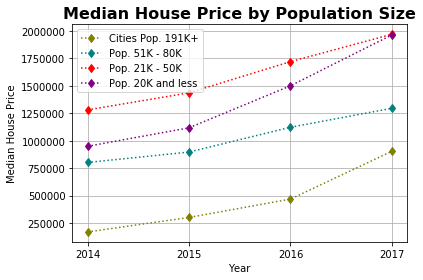

In [33]:
years = Housingprice_bycitysize.keys()
HousePrice1, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 191K and over",["2014","2015","2016","2017"]], 
                                                        color = "olive", linestyle =":", label = "Cities Pop. 191K+", marker = 'd')
HousePrice2, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 51K - 80K",["2014","2015","2016","2017"]], 
                                                        color = "teal", linestyle =":", label = "Pop. 51K - 80K", marker = 'd')
HousePrice3, = plt.plot(years, Housingprice_bycitysize.loc["Pop. 21K - 50K",["2014","2015","2016","2017"]], 
                                                        color = "red", linestyle =":", label = "Pop. 21K - 50K", marker = 'd')
HousePrice4 = plt.plot(years, Housingprice_bycitysize.loc["Pop. 20K and less",["2014","2015","2016","2017"]], 
                                                        color = "purple", linestyle =":", label = "Pop. 20K and less", marker = 'd')

plt.grid()
plt.title("Median House Price by Population Size", fontsize=16, fontweight='bold')
plt.ylabel("Median House Price")
plt.xlabel("Year")
plt.legend(loc='best')
plt.savefig("Images/Avg Ohio Housing Sale Value by Population size ADJUSTED.png")
plt.show()